# Assignment 5: Multi-layer Perceptron Classifier

For this assignment we used the Abalone data set from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/Abalone

Our data set contains 9 features consisting of 8 quantitative features:
   * Length
   * Diameter
   * Height
   * Whole Weight
   * Shucked Weight
   * Viscera Weight
   * Shell Weight
   * Rings
   
and 1 categorical feature (sex)
   * Sex

In [1]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("Abalone.csv") #read in data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data Preprocessing
We note that the sex column contains a third (infant) class, so we discard all entries with this label.

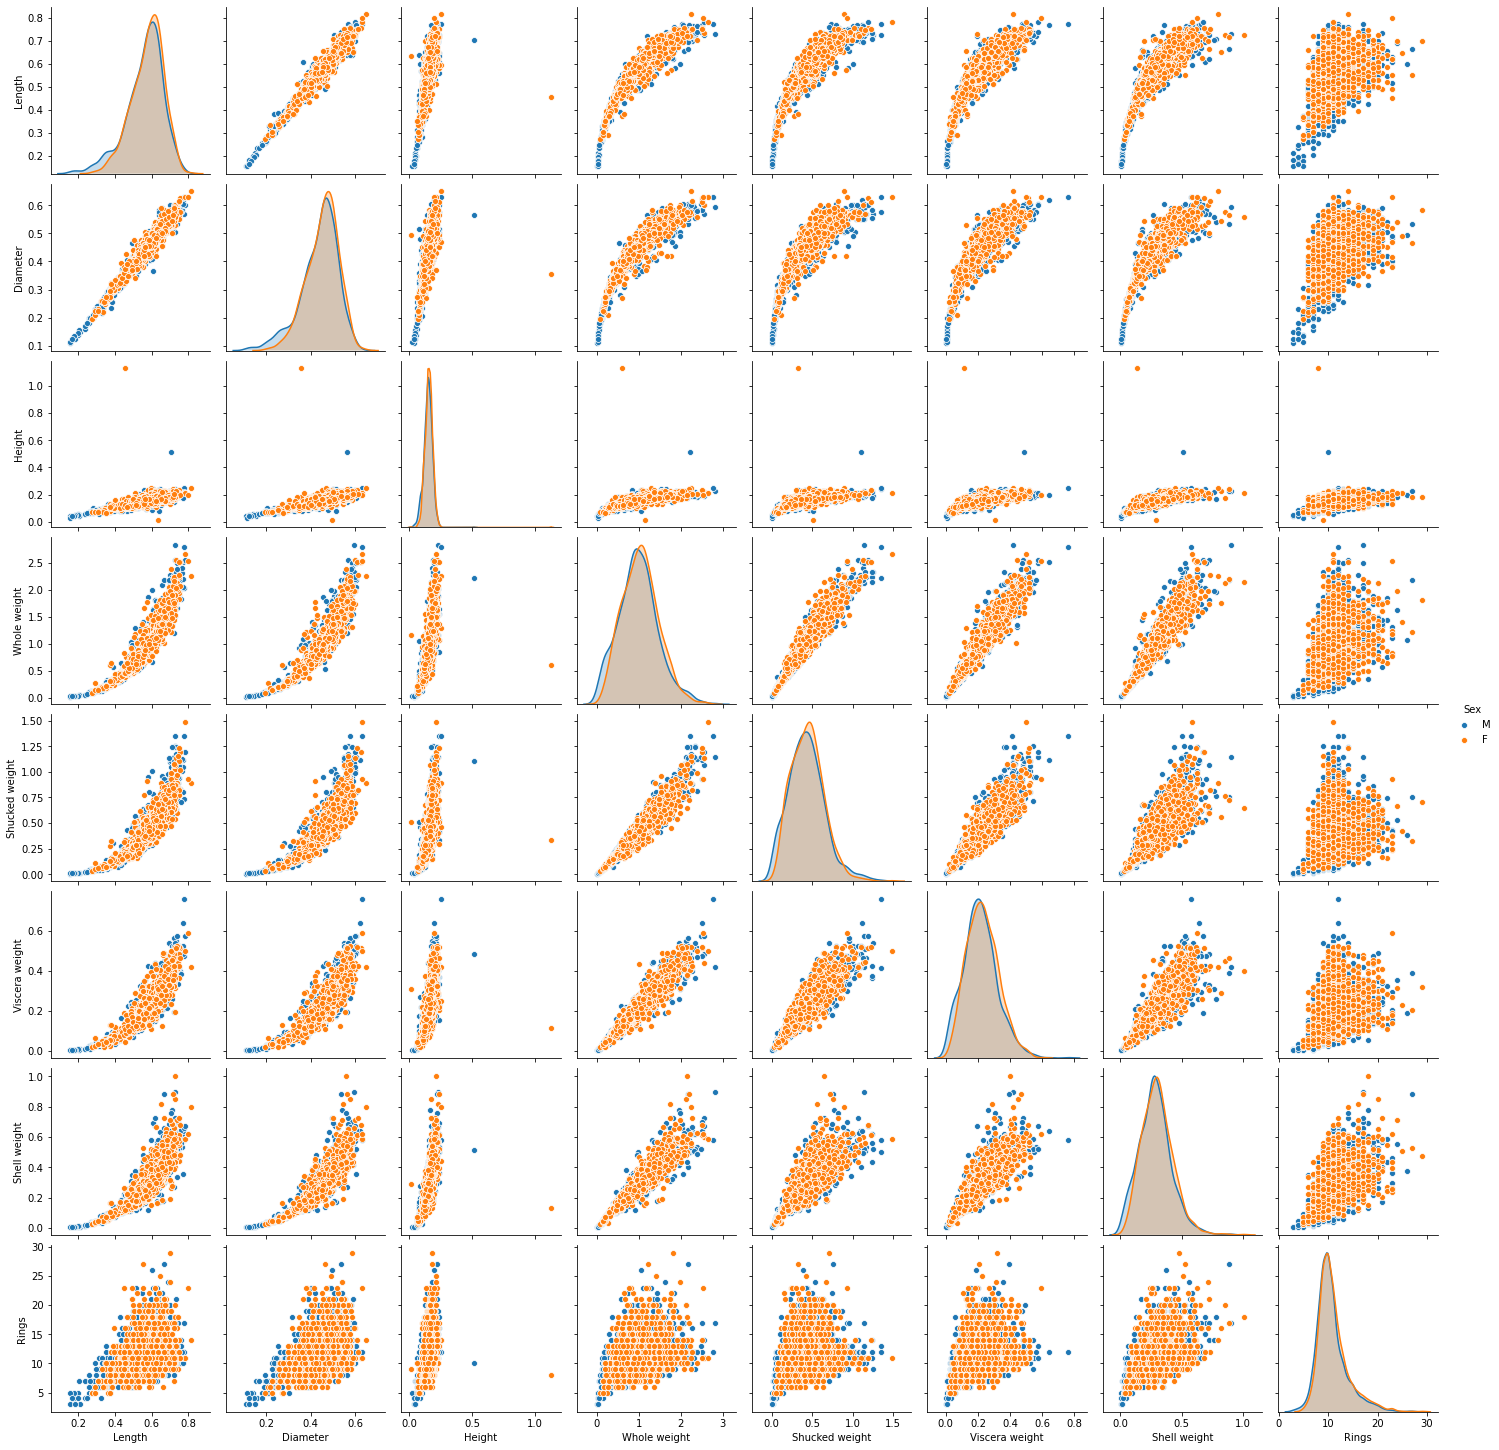

In [4]:
df = df[df.Sex != 'I']
df.head()
sns.pairplot(df, hue='Sex')

In [5]:
#set independent and dependent variables
x = df.iloc[:,1:9] #all entries from column 1 to 3
leng = df.iloc[:,1]
dim = df.iloc[:,2]
rin = df.iloc[:,3]
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
y = df.iloc[:,0]
print(y)

0       M
1       M
2       F
3       M
6       F
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 2835, dtype: object


In [7]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0) #20% testing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)  # apply same transformation to test data

## Training with MLP Classifier

In [60]:
#Train and fit data
mlp_clf = MLPClassifier(random_state=1, max_iter=300).fit(x_train,y_train)

#probability estimates
mlp_clf.predict_proba(x_train)

array([[0.53429248, 0.46570752],
       [0.39245895, 0.60754105],
       [0.49016627, 0.50983373],
       ...,
       [0.11288654, 0.88711346],
       [0.45311065, 0.54688935],
       [0.36075265, 0.63924735]])

In [61]:
ypred = mlp_clf.predict(x_train)
ypred

array(['F', 'M', 'M', ..., 'M', 'M', 'M'], dtype='<U1')

## Training Set Performance Metrics

In [57]:
mlp_score = mlp_clf.score(x_train,y_train)
mlp_score

0.6115520282186949

In [58]:
cm = sklearn.metrics.confusion_matrix(y_train, ypred)
tn, fp, fn, tp = cm.ravel()
print("MLP Classifer: ")
print(cm)

MLP Classifer: 
[[485 551]
 [330 902]]


In [59]:
print("Evaluation Metrics for Training Set: ")
cr = classification_report(y_train,ypred)
print(cr)
print("Misclassification Rate = ", (fp + fn)/(tp + tn + fp + fn))

Evaluation Metrics for Training Set: 
              precision    recall  f1-score   support

           F       0.60      0.47      0.52      1036
           M       0.62      0.73      0.67      1232

    accuracy                           0.61      2268
   macro avg       0.61      0.60      0.60      2268
weighted avg       0.61      0.61      0.60      2268

Misclassification Rate =  0.38844797178130513


## Test Set Performance Metrics

In [63]:
y_test_pred = mlp_clf.predict(x_test)
y_test_pred

array(['F', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'F',
       'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M',
       'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F', 'F',
       'F', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'F',
       'M', 'M', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'F',
       'F', 'M', 'M', 'F', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F',
       'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'M',
       'M', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'M', 'M',
       'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'F',
       'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M

In [72]:
mlp_test_score = mlp_clf.score(x_test,y_test)
mlp_test_score

0.5396825396825397

In [73]:
cm_test = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
tn_test, fp_test, fn_test, tp_test = cm.ravel()
print("MLP Classifer: ")
print(cm_test)

MLP Classifer: 
[[104 167]
 [ 94 202]]


In [76]:
print("Evaluation Metrics for Test Set: ")
cr_test = classification_report(y_test,y_test_pred)
print(cr_test)
print("Misclassification Rate = ", (fp_test + fn_test)/(tp_test + tn_test + fp_test + fn_test))

Evaluation Metrics for Test Set: 
              precision    recall  f1-score   support

           F       0.53      0.38      0.44       271
           M       0.55      0.68      0.61       296

    accuracy                           0.54       567
   macro avg       0.54      0.53      0.53       567
weighted avg       0.54      0.54      0.53       567

Misclassification Rate =  0.38844797178130513
